In [ ]:
import scipy.ndimage
import skimage

from skimage.filters import threshold_otsu as th_otsu
from skimage.filters import threshold_minimum as th_minimum
from skimage.filters import try_all_threshold
import skimage.measure as measure
from skimage.filters import threshold_yen as th_yen
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import os
filename = os.path.join(os.getcwd(), 'brain_tumor.png')
from skimage import io, img_as_ubyte, color
img = io.imread(filename)
percent = 5
img_path = os.path.join(os.getcwd(), 'brain_tumor.bmp')
brain = io.imread(img_path)
# brain_gray = color.rgb2gray(brain)
# brain_gray_uint8 = img_as_ubyte(brain_gray)
# brain = img_as_ubyte(brain)

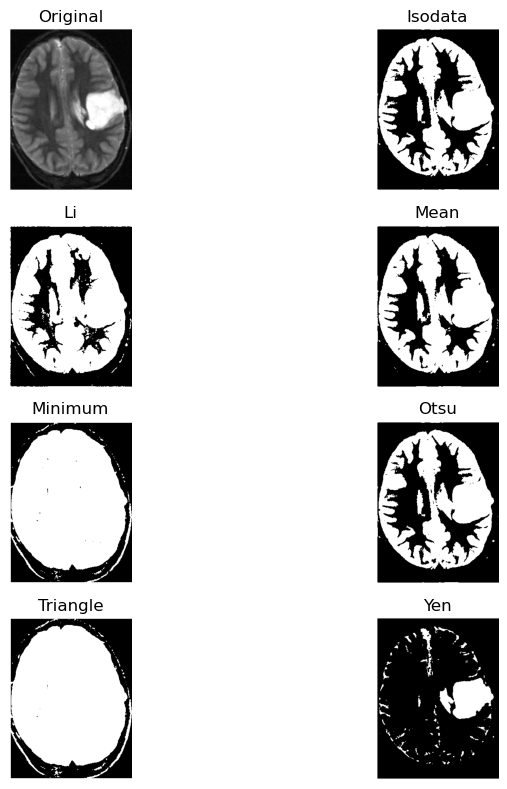

In [39]:
# skimage.img_as_ubyte(skimage.util.random_noise(img,'s&p', percent=5/100))
fig, ax = try_all_threshold(brain, figsize=(10, 8), verbose=False)
plt.show()

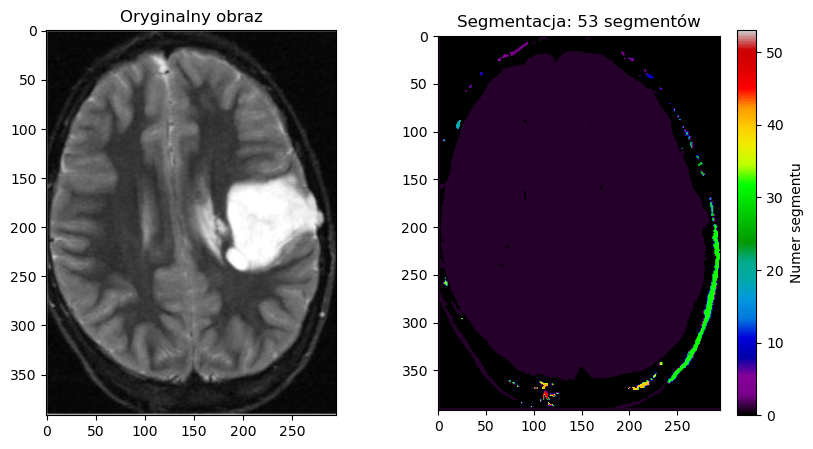

In [40]:
#region props
#skiage.measure
# skimage.measure.label(brain)

# Progowanie obrazu
threshold = th_minimum(brain)
binary_image = brain > threshold

# Segmentacja obrazu binarnego
labeled_image, num_labels = skimage.measure.label(binary_image, background=0, return_num=True)

# Wyświetlenie wyników
plt.figure(figsize=(10, 5))

# Wyświetlenie oryginalnego obrazu
plt.subplot(1, 2, 1)
plt.imshow(brain, cmap='gray')
plt.title('Oryginalny obraz')

# Wyświetlenie zsegmentowanego obrazu
plt.subplot(1, 2, 2)
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title(f'Segmentacja: {num_labels} segmentów')
plt.colorbar(label='Numer segmentu')
plt.show()

In [41]:
##scipy
# import scipy
# result = scipy.ndimage.gaussian_filter(img, sigma=2)

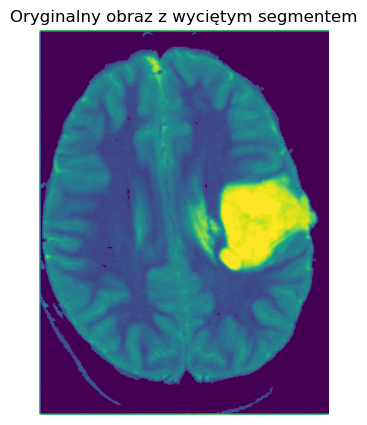

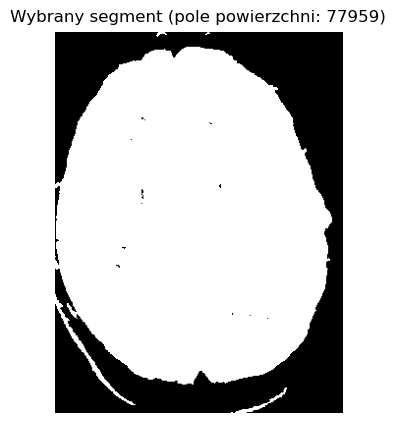

In [44]:
# Obliczenie regionprops dla poszczególnych segmentów
props = skimage.measure.regionprops(labeled_image)

# Znalezienie segmentu z największym polem powierzchni
max_area = 0
max_area_label = 0
for prop in props:
    if prop.area > max_area:
        max_area = prop.area
        max_area_label = prop.label

# Usunięcie pozostałych obiektów
binary_image_selected = labeled_image == max_area_label

cleared_brain = ski.morphology.remove_small_objects(binary_image_selected, min_size=600, connectivity=2)#connectivity????

# Wytnij oryginalny obraz przy użyciu maski
segmented_image = brain.copy()
segmented_image[~cleared_brain] = 0  # Ustawienie na zero wartości pikseli, które nie należą do wybranego segmentu

# Wyświetlenie oryginalnego obrazu z wyciętym segmentem
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image)
plt.title('Oryginalny obraz z wyciętym segmentem')
plt.axis('off')
plt.show()

# Wyświetlenie obrazu wybranego segmentu
plt.figure(figsize=(10, 5))
plt.imshow(binary_image_selected, cmap='gray')
plt.title(f'Wybrany segment (pole powierzchni: {max_area})')
plt.axis('off')
plt.show()

In [ ]:
brain_th = th_minimum(brain)
brain_area = brain > brain_th
brain_area = scipy.ndimage.binary_fill_holes(brain_area)
brain_l, lb_num = skimage.measure.label(brain_area, return_num=True)



plt.figure(figsize=(20,20))
plt.subplot(231)
plt.title("brain TH")
plt.imshow(brain, cmap="gray")
plt.subplot


brain_props = skimage.measure.regionprops(brain_l)
areas = [b_prop.area for b_prop in brain_props]
max_index = np.argmax(areas)
seg_brain = (brain_l==brain_props[max_index].label)

ca_props = skimage.measure.regionprops(brain_l)

Proportion between brain and the smaller object in brain: 1.2791649611133852e-05


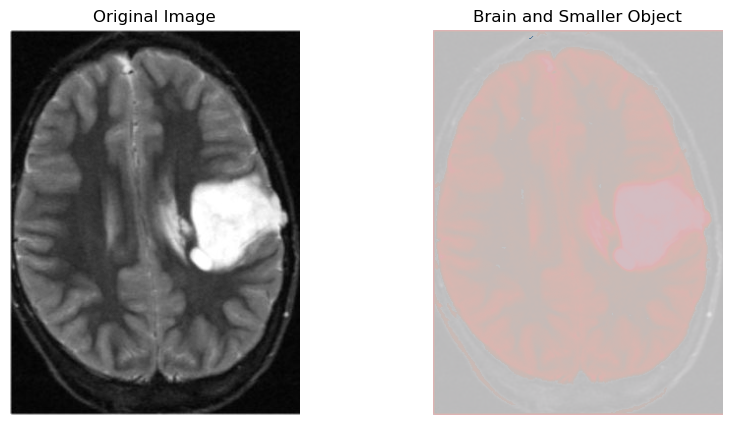

In [49]:
brain_th = th_minimum(brain)
brain_area = brain > brain_th
brain_area = scipy.ndimage.binary_fill_holes(brain_area)
brain_l, lb_num = skimage.measure.label(brain_area, return_num=True)

# Extract the brain segment
props = measure.regionprops(brain_l)
areas = [prop.area for prop in props]
max_index = np.argmax(areas)
seg_brain = (brain_l == props[max_index].label)

segmented_image[~seg_brain] = 0

# Extract the smaller object inside the brain
smaller_object = None
for prop in props:
    if prop.label != props[max_index].label:
        smaller_object = prop
        break

# Calculate the proportion between the brain and the smaller object
proportion = props[max_index-1].area / props[max_index].area

print("Proportion between brain and the smaller object in brain:", proportion)
# Plot the original image with both objects highlighted
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brain, cmap='gray')
plt.imshow(segmented_image, alpha=0.5, cmap='Reds')
plt.imshow(brain_l == smaller_object.label, alpha=0.5, cmap='Blues')
plt.title('Brain and Smaller Object')
plt.axis('off')

plt.show()

C:\Users\blasz\AppData\Local\Temp\ipykernel_1672\353464313.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])


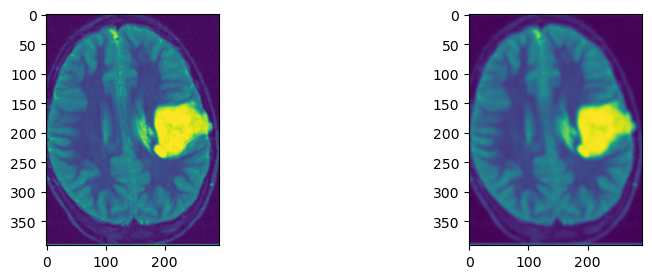

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2,1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img)
ax[1].imshow(result)

<class 'function'>


TypeError: Image data of dtype object cannot be converted to float

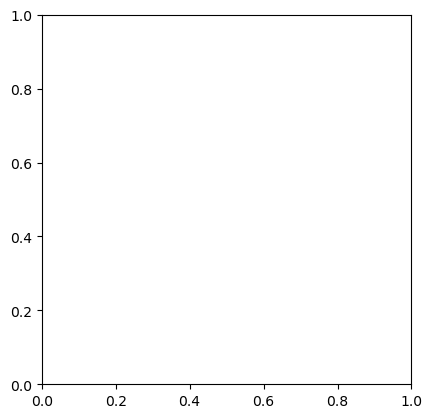

In [53]:
from skimage import data
coins = data.coins
print(type(coins))
plt.imshow(coins, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()
